In [ ]:
from statsmodels.regression import linear_model as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm2
from sklearn.metrics import r2_score
import scipy

In [ ]:
import os
import pingouin

#**Association of Microstructural white matter and personality traits based on Human connectome project dataset**

In [ ]:
csvfile = sorted(os.listdir())[1]
df = pd.read_csv(csvfile, sep =  '\t', index_col = 0)
col =df.columns
df[col[:]].head()

,tract,tags,number of tracts,mean length(mm),span(mm),curl,elongation,diameter(mm),volume(mm^3),trunk volume(mm^3),branch volume(mm^3),total surface area(mm^2),total radius of end regions(mm),total area of end regions(mm^2),irregularity,area of end region 1(mm^2),radius of end region 1(mm),irregularity of end region 1,area of end region 2(mm^2),radius of end region 2(mm),irregularity of end region 2,qa,nqa,dti_fa,md,ad,rd,gfa,iso,rdi,nrdi02L,nrdi04L,nrdi06L,Family_ID,Release,Acquisition,Gender,Gender.1,Age,Age_in_Yrs,...,NEORAW_31,NEORAW_32,NEORAW_33,NEORAW_34,NEORAW_35,NEORAW_36,NEORAW_37,NEORAW_38,NEORAW_39,NEORAW_40,NEORAW_41,NEORAW_42,NEORAW_43,NEORAW_44,NEORAW_45,NEORAW_46,NEORAW_47,NEORAW_48,NEORAW_49,NEORAW_50,NEORAW_51,NEORAW_52,NEORAW_53,NEORAW_54,NEORAW_55,NEORAW_56,NEORAW_57,NEORAW_58,NEORAW_59,NEORAW_60,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
100307,Arcuate_Fasciculus_L,dsi-studio-atk,15410.0,128.685,34.9171,3.68544,7.31386,17.5946,31288.0,27278.0,4010.0,60490.0,25.8050,5974.0,8.50406,4194.0,15.5507,0.181143,1780.0,10.25440,0.185587,0.256980,0.283087,0.393075,0.561520,0.805159,0.439618,0.129344,0.399504,0.379680,0.253480,0.035232,0.0,51488_81352,Q1,Q01,F,1,26-30,27,...,A,A,D,A,A,SD,A,N,D,A,D,D,N,D,D,A,A,D,A,A,D,SA,A,SD,D,D,D,D,SD,A,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
100408,Arcuate_Fasciculus_L,dsi-studio-atk,18813.0,120.789,35.9272,3.36205,6.04143,19.9934,37922.0,37293.0,629.0,61596.0,24.1617,7006.0,8.11874,3796.0,14.0523,0.163425,3210.0,10.10940,0.100022,0.226609,0.277610,0.392587,0.528972,0.760296,0.413328,0.122692,0.373097,0.351102,0.232266,0.031265,0.0,51730_81594,Q3,Q03,M,2,31-35,33,...,A,D,D,A,A,SD,A,SD,D,A,D,N,D,N,D,N,A,D,SA,A,D,A,A,N,D,N,D,A,A,A,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
101107,Arcuate_Fasciculus_L,dsi-studio-atk,16668.0,121.980,32.3953,3.76535,6.26146,19.4810,36358.0,30980.0,5378.0,61361.0,22.9751,6082.0,8.21947,3049.0,13.0326,0.175007,3033.0,9.94253,0.102393,0.279609,0.314404,0.402832,0.532722,0.771320,0.413631,0.126939,0.444134,0.419247,0.278296,0.037951,0.0,51969_81833,S500,Q06,M,2,22-25,22,...,A,N,D,A,SA,SA,N,N,N,SA,SD,N,D,A,SD,N,A,SD,SA,A,SD,SA,SA,A,D,N,SD,A,D,A,6.8,108.79,97.19,1.0,50.1,134.65,131.38,1.84,0.0,1.84
102311,Arcuate_Fasciculus_L,dsi-studio-atk,18673.0,130.061,26.5519,4.89837,7.05933,18.4240,34674.0,23458.0,11216.0,62156.0,25.2128,6711.0,8.25663,3541.0,15.9813,0.226593,3170.0,9.23147,0.084456,0.261298,0.267556,0.400733,0.533603,0.771390,0.414480,0.127738,0.409696,0.389229,0.256815,0.034314,0.0,51679_81543,S500,Q06,F,1,26-30,26,...,D,A,D,A,SA,D,D,SD,D,SA,SD,A,A,D,SD,D,A,D,A,SA,SD,A,A,N,D,D,D,N,A,SA,4.4,122.25,110.45,1.0,52.2,98.31,99.06,1.80,0.0,1.80
102513,Arcuate_Fasciculus_L,dsi-studio-atk,15044.0,123.999,34.9483,3.54807,6.58395,18.8335,34544.0,30769.0,3775.0,62686.0,24.1338,5758.0,8.54417,3177.0,15.0386,0.223638,2581.0,9.09521,0.100690,0.207193,0.272966,0.400221,0.563829,0.814448,0.438605,0.132035,0.313050,0.297991,0.199089,0.027787,0.0,56077_85897,S900,Q10,M,2,26-30,30,...,N,D,N,A,N,D,N,SD,N,A,D,N,A,N,A,D,N,SD,A,N,SD,A,SA,N,D,SD,A,SA,A,SA,5.2,108.79,98.04,2.0,54.3,84.07,82.37,1.92,0.0,1.92


In [ ]:
df[col[30:]].head()

,nrdi02L,nrdi04L,nrdi06L,Family_ID,Release,Acquisition,Gender,Gender.1,Age,Age_in_Yrs,Handedness,NEOFAC_A,NEOFAC_O,NEOFAC_C,NEOFAC_N,NEOFAC_E,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,3T_Full_Task_fMRI,3T_tMRI_PctCompl,fMRI_WM_PctCompl,fMRI_Gamb_PctCompl,fMRI_Mot_PctCompl,fMRI_Lang_PctCompl,fMRI_Soc_PctCompl,fMRI_Rel_PctCompl,fMRI_Emo_PctCompl,3T_dMRI_Compl,3T_dMRI_PctCompl,dMRI_3T_ReconVrs,fMRI_3T_ReconVrs,7T_Full_MR_Compl,7T_RS-fMRI_Count,7T_RS-fMRI_PctCompl,7T_Full_Task_fMRI,7T_tMRI_PctCompl,fMRI_Movie_Compl,...,NEORAW_31,NEORAW_32,NEORAW_33,NEORAW_34,NEORAW_35,NEORAW_36,NEORAW_37,NEORAW_38,NEORAW_39,NEORAW_40,NEORAW_41,NEORAW_42,NEORAW_43,NEORAW_44,NEORAW_45,NEORAW_46,NEORAW_47,NEORAW_48,NEORAW_49,NEORAW_50,NEORAW_51,NEORAW_52,NEORAW_53,NEORAW_54,NEORAW_55,NEORAW_56,NEORAW_57,NEORAW_58,NEORAW_59,NEORAW_60,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
100307,0.253480,0.035232,0.0,51488_81352,Q1,Q01,F,1,26-30,27,95,37.0,24.0,35.0,15.0,37.0,1,1,1,4,100.0,1,100.0,100,100.0,100,100.0,100.0,100.0,100,1,100.0,r227,r177,0,0,0,0,0.0,0,...,A,A,D,A,A,SD,A,N,D,A,D,D,N,D,D,A,A,D,A,A,D,SA,A,SD,D,D,D,D,SD,A,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
100408,0.232266,0.031265,0.0,51730_81594,Q3,Q03,M,2,31-35,33,55,33.0,29.0,34.0,15.0,33.0,1,1,1,4,100.0,1,100.0,100,100.0,100,100.0,100.0,100.0,100,1,100.0,r227,r177,0,0,0,0,0.0,0,...,A,D,D,A,A,SD,A,SD,D,A,D,N,D,N,D,N,A,D,SA,A,D,A,A,N,D,N,D,A,A,A,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
101107,0.278296,0.037951,0.0,51969_81833,S500,Q06,M,2,22-25,22,5,28.0,35.0,37.0,12.0,28.0,1,2,2,4,100.0,1,100.0,100,100.0,100,100.0,100.0,100.0,100,1,100.0,r227,r227,0,0,0,0,0.0,0,...,A,N,D,A,SA,SA,N,N,N,SA,SD,N,D,A,SD,N,A,SD,SA,A,SD,SA,SA,A,D,N,SD,A,D,A,6.8,108.79,97.19,1.0,50.1,134.65,131.38,1.84,0.0,1.84
102311,0.256815,0.034314,0.0,51679_81543,S500,Q06,F,1,26-30,26,10,29.0,34.0,38.0,18.0,27.0,1,1,1,4,100.0,1,100.0,100,100.0,100,100.0,100.0,100.0,100,1,100.0,r227,r227,1,4,100,1,100.0,1,...,D,A,D,A,SA,D,D,SD,D,SA,SD,A,A,D,SD,D,A,D,A,SA,SD,A,A,N,D,D,D,N,A,SA,4.4,122.25,110.45,1.0,52.2,98.31,99.06,1.80,0.0,1.80
102513,0.199089,0.027787,0.0,56077_85897,S900,Q10,M,2,26-30,30,50,26.0,39.0,27.0,12.0,27.0,1,2,2,4,100.0,1,100.0,100,100.0,100,100.0,100.0,100.0,100,1,100.0,r227,r227,0,0,0,0,0.0,0,...,N,D,N,A,N,D,N,SD,N,A,D,N,A,N,A,D,N,SD,A,N,SD,A,SA,N,D,SD,A,SA,A,SA,5.2,108.79,98.04,2.0,54.3,84.07,82.37,1.92,0.0,1.92


In [ ]:
diff_labels = df.columns[df.columns.tolist().index("qa"):df.columns.tolist().index("rdi") + 1].tolist()
pers_labels = df.columns[df.columns.tolist().index("NEOFAC_A"):df.columns.tolist().index("NEOFAC_E") + 1].tolist()
diff_labels, pers_labels


#same as doing

#diff_labels = ["qa", "nqa", "dti_fa", "md", "ad", "rd", "gfa", "iso","rdi"]
#pers_labels = ["NEOFAC_A","NEOFAC_O", "NEOFAC_C", "NEOFAC_N", "NEOFAC_E"]

(['qa', 'nqa', 'dti_fa', 'md', 'ad', 'rd', 'gfa', 'iso', 'rdi'],
 ['NEOFAC_A', 'NEOFAC_O', 'NEOFAC_C', 'NEOFAC_N', 'NEOFAC_E'])

In [ ]:
!pip install pingouin

     |████████████████████████████████| 225kB 5.5MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.8-cp36-none-any.whl size=221687 sha256=f1dff466ef9cdaa72f65df0cf2cb601fad71bc69bd06011ad3b992f2a83a65b0
  Stored in directory: /root/.cache/pip/wheels/d6/9e/53/f885f73f29cf7c8cac3d8f4b1532bbfef2f5eb543946ac9055
  Created wheel for outdated: filename=outdated-0.2.0-cp36-none-any.whl size=4962 sha256=c7a296bc8d2202a6bd9068a6750a7b6fea351bd97724eb0a5241f0d664ac61a8
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp36-none-any.whl size=7050 sha256=93b46d849a37bfe55bd739255efb9e0a56983880322c53b8183f89666ec3be73
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated littleutils


## Linear regression

In [ ]:
pval = []
features = []
coef = []
intercept = []
xs = []
for file in sorted(os.listdir()):
  if "tsv" in file:
    fd = pd.read_csv(file, sep =  '\t', index_col = 0)
    for s in pers_labels:
      for l in diff_labels:
        x = fd[s]
        idx = np.where(np.isnan(x))
        y = fd[l]
        idx2 = np.where(np.isnan(y)) 
        x = np.delete(np.array(x),idx2[0].tolist()+ idx[0].tolist())
        y = np.delete(np.array(y),idx2[0].tolist()+ idx[0].tolist())
        x2 = sm2.add_constant(x)
        ls = sm.OLS(y, x2).fit()
        pval.append(ls.pvalues[1])
        coef.append(ls.params[1])
        intercept.append(ls.params[0])
        xs.append(x)
        features.append([file,s,l])

In [ ]:
files = np.array(features)[np.array(pval) < 0.0005]
pval.index(min(pval))

409

In [ ]:
pval[425]

0.7114671538981934

In [ ]:
features[425]

['Cingulum_Parahippocampal_R.tsv', 'NEOFAC_C', 'dti_fa']

In [ ]:
len(files)

2

R2:  2.8232571893090586 %
Slope coeff and pvalue:  5.402531341143795 0.0004391775732858818


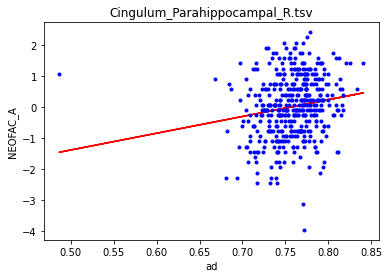

R2:  2.7982672437806055 %
Slope coeff and pvalue:  5.132255005556048 0.0004660759918897445


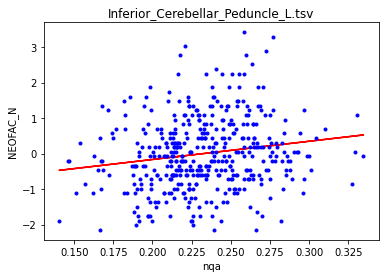

In [ ]:
for r in range(len(files)):
  f = files[r][0]
  l = files[r][1]
  s = files[r][2]
  fd = pd.read_csv(f, sep =  '\t', index_col = 0)
  x = fd[s]
  y = fd[l] 
  idx = np.where(np.isnan(x))
  idx2 = np.where(np.isnan(y))
  y = np.delete(np.array(y),idx2[0].tolist()+ idx[0].tolist())
  x = np.delete(np.array(x),idx2[0].tolist()+ idx[0].tolist())
  #x = np.delete(np.array(x),13) # outlier in Cingulum_Parahippocampal_R case
  #y = np.delete(np.array(y),13) #outlier in Cingulum_Parahippocampal_R case
  #x = (x- np.mean(x))/np.std(x) # z-score
  y = (y- np.mean(y))/np.std(y) # z-score
  x2 = sm2.add_constant(x)
  ls = sm.OLS(y, x2).fit()
  print('R2: ', r2_score(y,ls.params[0] + ls.params[1]*x)*100, '%')
  plt.figure()
  plt.plot(x, ls.params[0] + ls.params[1]*x, 'r-')
  
  print('Slope coeff and pvalue: ',ls.params[1], ls.pvalues[1])
  ls.summary()
  plt.title(f)
  plt.plot(x,y, 'b.')
  plt.ylabel(l)
  plt.xlabel(s)
  plt.show()

In [ ]:
ls.params[1]

5.132255005556048

In [ ]:
np.corrcoef(np.log(x),np.log(y))[0,1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


nan

In [ ]:
scipy.stats.spearmanr(x,y)

SpearmanrResult(correlation=0.17105477913272318, pvalue=0.0003440321880195163)

In [ ]:
np.corrcoef(x,y)[0,1]

0.16728022129889186

In [ ]:
ls.params[1]*np.std(x)/np.std(y)

0.1672802212988918

In [ ]:
ls.params[1]*np.std(x)/np.std(y)

0.1672802212988918

## Taking into account some covariates

In [ ]:
import pingouin

In [ ]:
pvals = []
corrs = []
features = []
for file in sorted(os.listdir()):
  if "tsv" in file:
    #print(file)
    fd = pd.read_csv(file, sep =  '\t', index_col = 0)
    for s in pers_labels:
      for l in diff_labels:
        rs = pingouin.partial_corr(fd,s,l, ["Gender.1", "Age_in_Yrs"])
        corrs.append(rs['r'][0])
        pvals.append(rs['p-val'][0])
        features.append([file,s,l])

In [ ]:
pvals.index(min(pvals))
ins = np.argsort(pvals)[:5]

In [ ]:
rs

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,434,0.118285,"[0.02, 0.21]",0.013991,0.009416,0.013673,1.244,0.694896


In [ ]:
for i in ins:
  print(pvals[i], corrs[i], features[i])

0.001457730280270451 0.1523341212345253 ['Uncinate_Fasciculus_R.tsv', 'NEOFAC_N', 'nqa']
0.002023812740833943 -0.14777896341411367 ['Superior_Longitudinal_Fasciculus1_L.tsv', 'NEOFAC_N', 'rd']
0.002140499833552946 -0.1469880153337125 ['Thalamic_Radiation_Posterior_L.tsv', 'NEOFAC_E', 'nqa']
0.0030927014077332185 0.14169781832492298 ['Superior_Longitudinal_Fasciculus1_L.tsv', 'NEOFAC_N', 'dti_fa']
0.0034450298726943877 0.1401133454404422 ['Optic_Radiation_L.tsv', 'NEOFAC_N', 'nqa']


## Multiple Linear Model

In [ ]:
def ordinary_least_squares(X, y):

  """ 
  Function that computes OLS analytically!

  NB: to take into account also an intercept, a constant vector of 1 needs to be included in X.
  then theta_hat will contain both the results for the intercept and the result for the coefficients

  NB: this method assumes that the theta_hat found is a minimum. To prove it, one needs 
  to differentiate once more to obtain the Hessian matrix and show that it is positive definite.
  So in general, it is better to use the python's methods:

  model = LinearRegression() 
  model.fit(X,y) or
  sm.OLS(y,Xc).fit()

  X (ndarray): design matrix of shape (n_samples, n_regressors)
  y (ndarray): vector of measurements of shape (n_samples)
  Returns:
  ndarray: estimated parameter values of shape (n_regressors)
  """


  # Compute theta_hat using OLS
  theta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

  return theta_hat



In [ ]:
from sklearn.linear_model import LinearRegression

Tract Cingulum_Parahippocampal_R.tsv
Tract Inferior_Cerebellar_Peduncle_L.tsv


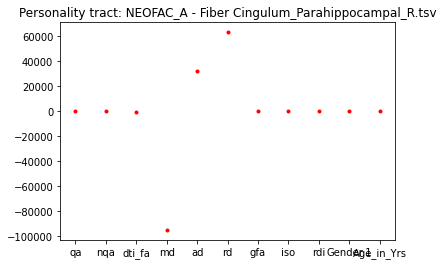

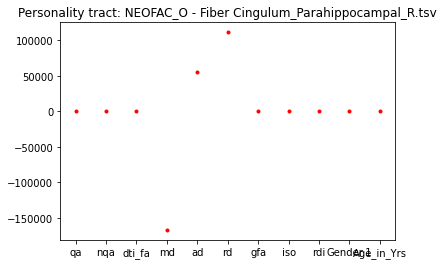

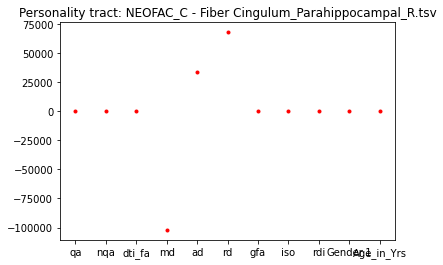

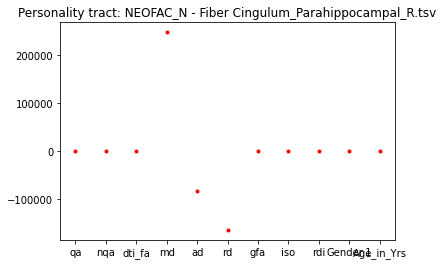

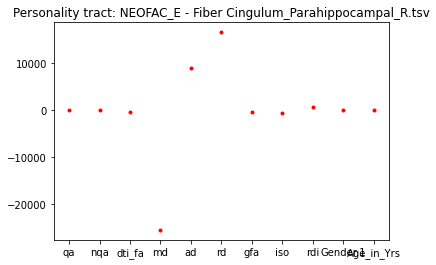

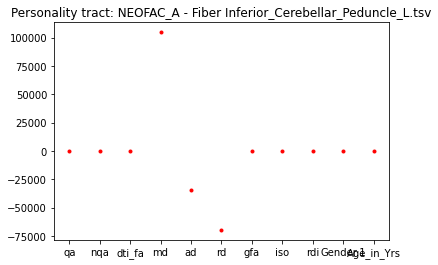

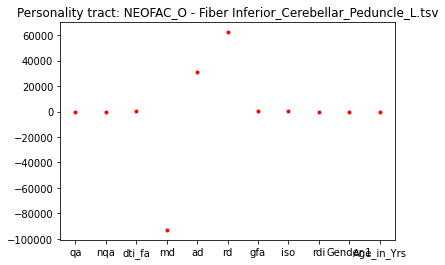

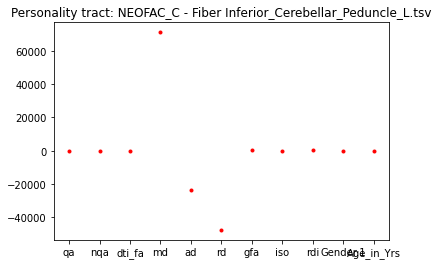

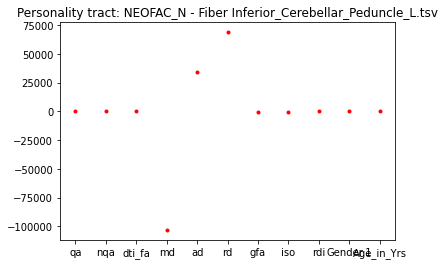

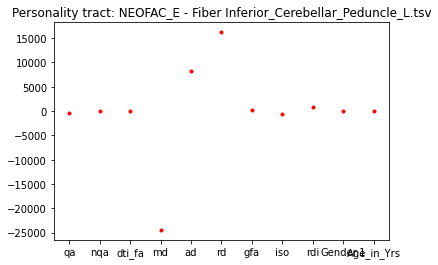

In [ ]:

for r in range(len(files)):
  print('Tract', files[r][0])
  for t in pers_labels:
    f = files[r][0]

    fd = pd.read_csv(f, sep =  '\t', index_col = 0)
    col = diff_labels + ["Gender.1"] + ["Age_in_Yrs"] 
    X = fd[col]
    y = fd[t]

    model = LinearRegression()
    idx2 = np.where(np.isnan(y))
    y = np.array(y)
    y = np.delete(y,idx2[0])

    X = np.array(X)
    Xnew = np.empty((X.shape[0]-1,X.shape[1]))

    for l in range(len(X[0])):
      Xnew[:,l] = np.delete(X[:,l], idx2[0])

    Xnew2 = sm2.add_constant(Xnew)
    model.fit(Xnew,y)
    theta_hat = ordinary_least_squares(Xnew2, y)

    y_hat = Xnew2 @ theta_hat
    # Compute MSE
    
    #print('Personality tract:', t)
    #print(model.score(Xnew,y)*100)
    #print(f"MSE = {np.mean((y - y_hat)**2):.2f}") 
    plt.figure()
    plt.title('Personality tract: %s - Fiber %s' %(t,f))
    plt.plot(model.coef_, 'r.')
    plt.xticks(np.arange(0,len(col),1), labels = col)
    

In [ ]:
print(col)

['qa', 'nqa', 'dti_fa', 'md', 'ad', 'rd', 'gfa', 'iso', 'rdi', 'Gender.1', 'Age_in_Yrs']


In [ ]:
np.argsort(np.abs(model.coef_))[::-1]
col[3], col[4], col[5]

('md', 'ad', 'rd')

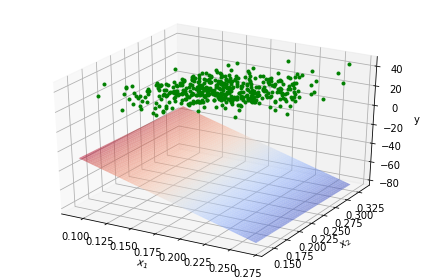

In [ ]:
theta_hat = ordinary_least_squares(Xnew2, y)
xx, yy = np.mgrid[min(Xnew2[:,1]):max(Xnew2[:,1]):50j, min(Xnew2[:,2]):max(Xnew2[:,2]):50j]
y_hat_grid = np.array([xx.flatten(), yy.flatten()]).T @ theta_hat[1:3]
y_hat_grid = y_hat_grid.reshape((50, 50))
ax = plt.subplot(projection='3d')
ax.plot(Xnew2[:, 1], Xnew2[:, 2], y, 'g.')
ax.plot_surface(xx, yy, y_hat_grid, linewidth=0, alpha=0.5, color='C1',
                cmap=plt.get_cmap('coolwarm'))

ax.set(
    xlabel='$x_1$',

    ylabel='$x_2$',
    zlabel='y'
)
plt.tight_layout()

## Studying shape features

In [ ]:
shape_labels = fd.columns[fd.columns.tolist().index("span(mm)"):fd.columns.tolist().index('irregularity of end region 2')+1]

In [ ]:
pval = []
features = []
coef = []
intercept = []
xs = []
for file in sorted(os.listdir()):
  if "tsv" in file:
    #print(file)
    fd = pd.read_csv(file, sep =  '\t', index_col = 0)
    for s in shape_labels:
      for l in pers_labels:
        x = fd[s]
        idx = np.where(np.isnan(x))
        y = fd[l]
        idx2 = np.where(np.isnan(y)) 
        x = np.delete(np.array(x),idx2[0].tolist()+ idx[0].tolist())
        y = np.delete(np.array(y),idx2[0].tolist()+ idx[0].tolist())
        x2 = sm2.add_constant(x)
        ls = sm.OLS(y, x2).fit()
        pval.append(ls.pvalues[1])
        coef.append(ls.params[1])
        intercept.append(ls.params[0])
        xs.append(x)
        features.append([file,s,l])

In [ ]:
files = np.array(features)[np.array(pval) < 0.0005]
pval.index(min(pval))

4560

In [ ]:
pval[4560]

7.852132837753916e-06

R2:  2.7973578541485966 %
Slope coeff and pvalue:  0.0022015207210777234 0.0004670854531520533


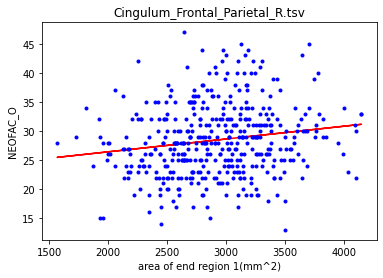

R2:  3.3230172817187764 %
Slope coeff and pvalue:  -0.0001580298771602362 0.00013415245271246394


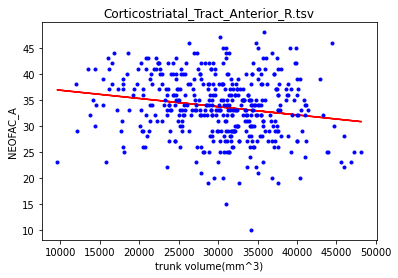

R2:  2.9306340005438303 %
Slope coeff and pvalue:  0.00017296491176531877 0.0003402441242666674


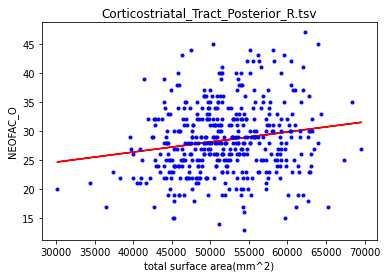

R2:  3.057887634603107 %
Slope coeff and pvalue:  0.001679430459360509 0.00025151907598574386


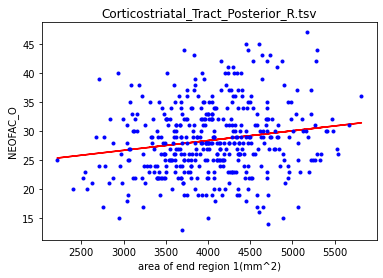

R2:  2.8860424453652445 %
Slope coeff and pvalue:  -0.001486327909135837 0.00037827644644477826


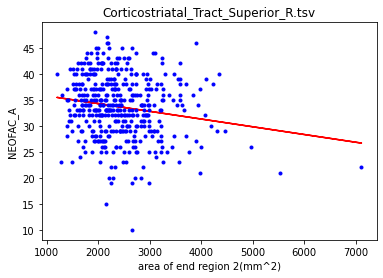

R2:  3.3686779401681743 %
Slope coeff and pvalue:  0.9442202785147955 0.00012040208927474183


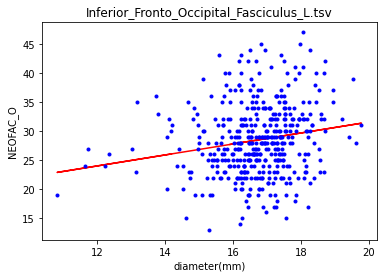

R2:  4.467772840961636 %
Slope coeff and pvalue:  0.00021520023384863856 8.954223790856497e-06


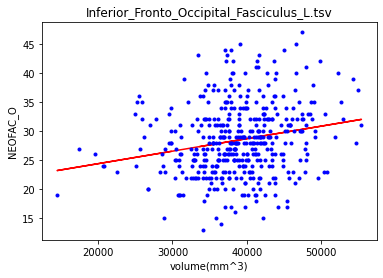

R2:  2.9387564219034434 %
Slope coeff and pvalue:  0.00013109899131912847 0.00033374168484076274


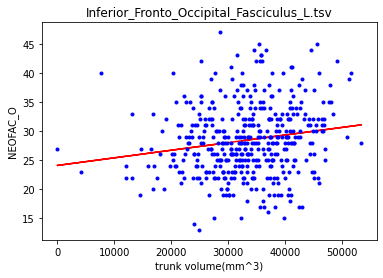

R2:  3.596828419890763 %
Slope coeff and pvalue:  0.00012849962684016288 7.016552905898342e-05


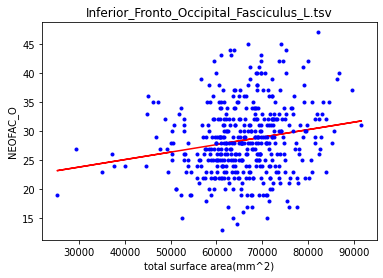

R2:  4.5070803851959385 %
Slope coeff and pvalue:  0.001263860918471783 8.159801570653612e-06


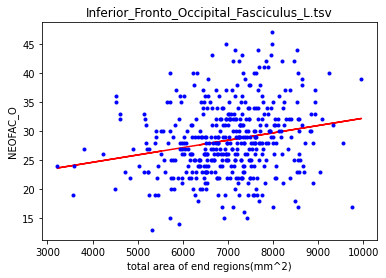

R2:  3.6635734564636646 %
Slope coeff and pvalue:  0.0016273256831047939 5.9918153343650215e-05


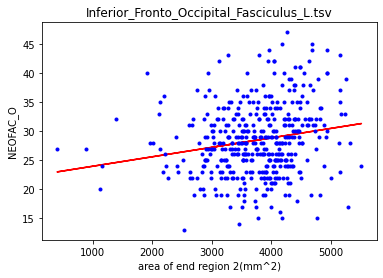

R2:  3.599012704997273 %
Slope coeff and pvalue:  0.0008682737811061145 6.980390188839655e-05


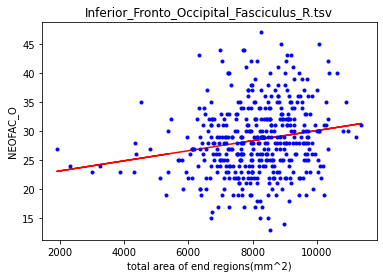

R2:  2.9125715375071692 %
Slope coeff and pvalue:  0.0010327170090300025 0.0003551637963212678


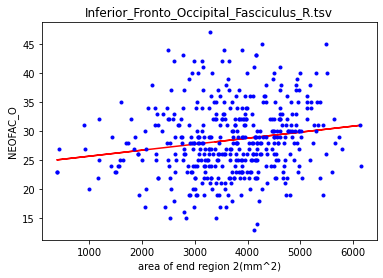

R2:  2.7982757488972942 %
Slope coeff and pvalue:  0.9234046667804666 0.0004660665612021038


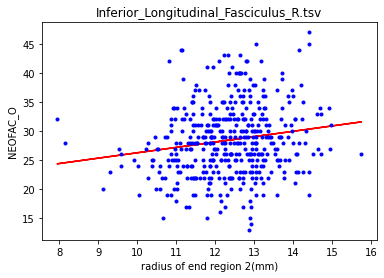

R2:  3.401164752311858 %
Slope coeff and pvalue:  -3.2218880801061083 0.00011148758119024588


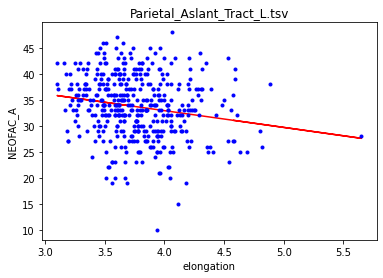

R2:  2.7717462049611896 %
Slope coeff and pvalue:  0.8623165403064708 0.0004964358801835682


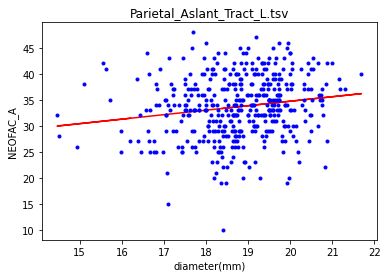

R2:  3.176515284345016 %
Slope coeff and pvalue:  0.31558583941051344 0.0001898329401375111


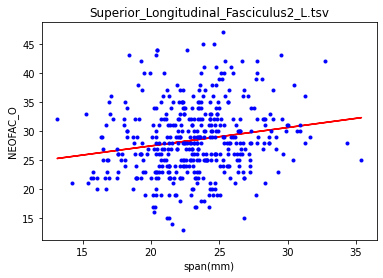

R2:  3.06723019312396 %
Slope coeff and pvalue:  0.0011166336785460474 0.0002460044415639995


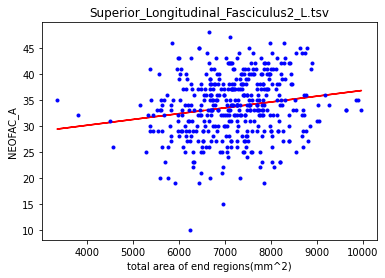

R2:  4.5233412424895425 %
Slope coeff and pvalue:  0.0021469962283189726 7.852132837753916e-06


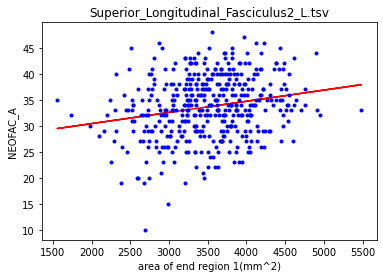

R2:  2.812265082212684 %
Slope coeff and pvalue:  0.0017248054666890696 0.00045081147943683205


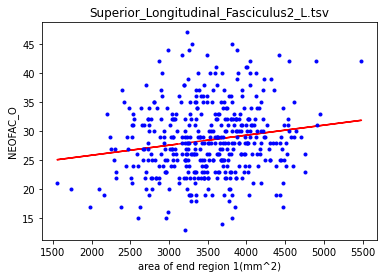

In [ ]:
for r in range(len(files)):
  f = files[r][0]
  s = files[r][1]
  l = files[r][2]
  fd = pd.read_csv(f, sep =  '\t', index_col = 0)
  x = fd[s]
  y = fd[l] 
  idx = np.where(np.isnan(x))
  idx2 = np.where(np.isnan(y))
  y = np.delete(np.array(y),idx2[0].tolist()+ idx[0].tolist())
  x = np.delete(np.array(x),idx2[0].tolist()+ idx[0].tolist())
  #x = np.delete(np.array(x),13) # outlier in Cingulum_Parahippocampal_R case
  #y = np.delete(np.array(y),13) #outlier in Cingulum_Parahippocampal_R case
  #x = (x- np.mean(x))/np.std(x) # z-score
  #y = (y- np.mean(y))/np.std(y) # z-score
  x2 = sm2.add_constant(x)
  ls = sm.OLS(y, x2).fit()
  print('R2: ', r2_score(y,ls.params[0] + ls.params[1]*x)*100, '%')
  plt.figure()
  plt.plot(x, ls.params[0] + ls.params[1]*x, 'r-')
  
  print('Slope coeff and pvalue: ',ls.params[1], ls.pvalues[1])
  ls.summary()
  plt.title(f)
  plt.plot(x,y, 'b.')
  plt.ylabel(l)
  plt.xlabel(s)
  plt.show()

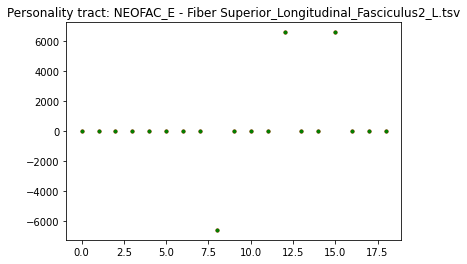

In [ ]:

for r in range(len(files)):
  #print('Tract', files[r][0])
  for t in pers_labels:
    f = files[r][0]
    fd = pd.read_csv(f, sep =  '\t', index_col = 0)
    col = shape_labels.tolist() + ["Gender.1"] + ["Age_in_Yrs"]

    X = fd[col]
    y = fd[t]

    model = LinearRegression()
    idx2 = np.where(np.isnan(y))

    y = np.array(y)
    y = np.delete(y,idx2[0])

    X = np.array(X)
    Xnew = np.empty((X.shape[0]-1,X.shape[1]))

    for l in range(len(X[0])):
      Xnew[:,l] = np.delete(X[:,l], idx2[0])
  
    Xnew2 = sm2.add_constant(Xnew)

    model.fit(Xnew,y)

    theta_hat = ordinary_least_squares(Xnew2,y)

    y_hat = Xnew2 @ theta_hat
    ols = sm.OLS(y, Xnew2).fit()

    
    
    #print('Personality tract:', t)
    #print(model.score(Xnew,y)*100)
    #print(f"MSE = {np.mean((y - y_hat)**2):.2f}") 


plt.figure()
plt.title('Personality tract: %s - Fiber %s' %(t,f))
plt.plot(model.coef_, 'r.')
plt.plot(ols.params[1:], 'g.')
#plt.xticks(np.arange(0,len(col),1), labels = col)

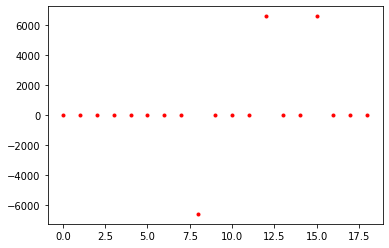

In [ ]:
plt.plot(model.coef_, 'r.')

In [ ]:

print(np.argsort(np.abs(model.coef_))[::-1])
col[12], col[8], col[15]

[12  8 15 16 13 10  3  2 17  1  0 18 11 14  4  7  5  6  9]


('radius of end region 1(mm)',
 'total radius of end regions(mm)',
 'radius of end region 2(mm)')

## Females

In [ ]:
males = []
females = []
gender = np.array(fd["Gender.1"])
for r in range(len(gender)):
  if gender[r] == 1:
    females.append(fd.index[r])


for r in range(len(gender)):
  if gender[r] == 2:
    males.append(fd.index[r])


maledf = df.loc[males]
femaledf = df.loc[females]

In [ ]:
pval = []
features = []
coef = []
intercept = []
xs = []
for file in sorted(os.listdir()):
  if "tsv" in file:
    fd = pd.read_csv(file, sep =  '\t', index_col = 0)
    males = []
    females = []  
    gender = np.array(fd["Gender.1"])
    for r in range(len(gender)):
      if gender[r] == 1:
        females.append(fd.index[r])


    #for r in range(len(gender)):
     # if gender[r] == 2:
      #  males.append(fd.index[r])


    #maledf = df.loc[males]
    femaledf = df.loc[females]
    for s in diff_labels:
      for l in pers_labels:
        x = femaledf[s]
        idx = np.where(np.isnan(x))
        y = femaledf[l]
        idx2 = np.where(np.isnan(y)) 
        x = np.delete(np.array(x),idx2[0].tolist()+ idx[0].tolist())
        y = np.delete(np.array(y),idx2[0].tolist()+ idx[0].tolist())
        x2 = sm2.add_constant(x)
        ls = sm.OLS(y, x2).fit()
        pval.append(ls.pvalues[1])
        coef.append(ls.params[1])
        intercept.append(ls.params[0])
        xs.append(x)
        features.append([file,s,l])

In [ ]:
files = np.array(features)[np.array(pval) < 0.005]
files

array([], shape=(0, 3), dtype='<U42')

In [ ]:
len(pval)
pval.index(min(pval))

706

In [ ]:
files

array([], shape=(0, 3), dtype='<U42')

## Males

In [ ]:
np.array(df).shape

(435, 618)

In [ ]:
np.array(maledf).shape

(192, 618)

In [ ]:
len(femaledf)

243

In [ ]:
pval = []
features = []
coef = []
intercept = []
xs = []
for file in sorted(os.listdir()):
  if "tsv" in file:
   
    fd = pd.read_csv(file, sep =  '\t', index_col = 0)
    males = []
    females = []  
    gender = np.array(fd["Gender.1"])
    #for r in range(len(gender)):
      #if gender[r] == 1:
        #females.append(fd.index[r])


    for r in range(len(gender)):
      if gender[r] == 2:
        males.append(fd.index[r])


    maledf = df.loc[males]
    #femaledf = df.loc[females]
    for s in diff_labels:
      for l in pers_labels:
        x = maledf[s]
        idx = np.where(np.isnan(x))
        y = maledf[l]
        idx2 = np.where(np.isnan(y)) 
        x = np.delete(np.array(x),idx2[0].tolist()+ idx[0].tolist())
        y = np.delete(np.array(y),idx2[0].tolist()+ idx[0].tolist())
        x2 = sm2.add_constant(x)
        ls = sm.OLS(y, x2).fit()
        pval.append(ls.pvalues[1])
        coef.append(ls.params[1])
        intercept.append(ls.params[0])
        xs.append(x)
        features.append([file,s,l])

In [ ]:
files = np.array(features)[np.array(pval) < 0.005]
pval.index(min(pval))

703

In [ ]:
files

array([], shape=(0, 3), dtype='<U42')

In [ ]:
files

array([], shape=(0, 3), dtype='<U42')

In [ ]:
pval[2862]

0.10834662561437974

In [ ]:
features[1730]

['Inferior_Cerebellar_Peduncle_R.tsv', 'ad', 'NEOFAC_A']

In [ ]:
files;